PART 1: STATISTICAL FORECASTING

In [1]:
#Import libs
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

1.1. MOVING AVERAGE

Input number of historical demand period: 10
5
6
4
7
5
6
4
7
5
6
Input number of forecast period: 2
Input number of average period: 3
Bias: 0.29, 5.00%
MAPE: 22.29%
MAE: 1.24,21.67%
RMSE: 1.40,24.55%


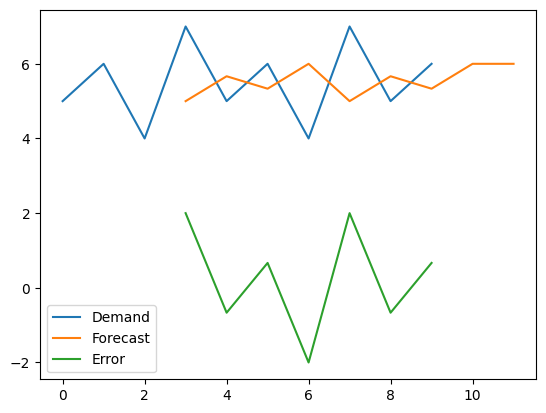

In [2]:
#MOVING AVERAGE FORECASTING
def moving_average(demand=[],forecast_period=[],average_period=[]):

#Setup parameter
  n1 = int(input("Input number of historical demand period: "))
  for i in range(n1):
      n2 = int(input())
      demand.append(n2)
  forecast_period = int(input("Input number of forecast period: "))
  average_period = int(input("Input number of average period: "))

# Append np.nan into the demand array to cover future period
  demand = np.append(demand,[np.nan]*forecast_period)
# Define the forecast array
  forecast = np.full(n1+forecast_period,np.nan)
# Create all the t+1 forecast until end of historical period
  for t in range(average_period,n1):
    forecast[t] = np.mean(demand[t-average_period:t])
# Forecast for all extra periods
    forecast[t+1:] = np.mean(demand[t-average_period+1:t+1])
# Return a DataFrame with the demand, forecast & error
  error=demand-forecast
  df = pd.DataFrame.from_dict({'Demand':demand,'Forecast':forecast,'Error':error})
  df[['Demand','Forecast','Error']].plot()
  return df

def KPI(df):
  #BIAS
  avg_demand = df.loc[df['Error'].notnull(),'Demand'].mean()
  avg_bias = df['Error'].mean()
  scale_bias = avg_bias/avg_demand
  print('Bias: {:0.2f}, {:.2%}'.format(avg_bias,scale_bias))

  #MAPE
  abs_error = df['Error'].abs()
  abs_error_percentage = abs_error/df['Demand']
  MAPE = abs_error_percentage.mean()
  print('MAPE: {:.2%}'.format(MAPE))

  #MAE
  MAE = abs_error.mean()
  MAE_percentage = MAE/avg_demand

  print("MAE: {:.2f},{:.2%}".format(MAE,MAE_percentage))

  #RMSE root mean square error
  RMSE = np.sqrt((df["Error"]**2).mean())
  RMSE_percentage = RMSE/avg_demand
  print("RMSE: {:.2f},{:.2%}".format(RMSE,RMSE_percentage))

KPI(moving_average())


1.2. SIMPLE EXPONENTIAL SMOOTHING

Input number of historical demand period: 10
4
5
6
7
4
5
5
4
6
5
Input number of forecast period: 1
Input alpha with 0 <= alpha <= 1: 0.6
Bias: 0.21, 4.05%
MAPE: 20.57%
MAE: 1.04,19.91%
RMSE: 1.28,24.49%


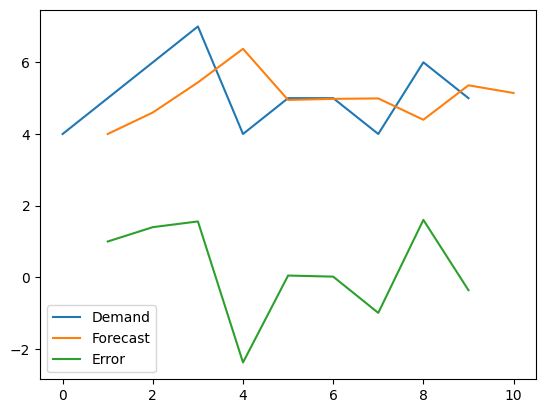

In [3]:

def exponential_smoothing(demand=[],forecast_period=[],alpha=[]):

#Setup parameter
  n1 = int(input("Input number of historical demand period: "))
  for i in range(n1):
      n2 = int(input())
      demand.append(n2)
  forecast_period = int(input("Input number of forecast period: "))
  alpha = float(input("Input alpha with 0 <= alpha <= 1: "))

# Append np.nan into the demand array to cover future period
  demand = np.append(demand,[np.nan]*forecast_period)
# Define the forecast array
  forecast = np.full(n1+forecast_period,np.nan)
# Initialization of first forecast
  forecast[1]=demand[0]
# Create all the t+1 forecast until end of historical period
  for t in range(2,n1+1):
    forecast[t] = alpha*demand[t-1]+(1-alpha)*forecast[t-1]
# Forecast for all extra periods
  for t in range(n1+1,n1+forecast_period):
# Update the forecast as the previous forecast
    forecast[t] = forecast[t-1]

  error=demand-forecast
  df = pd.DataFrame.from_dict({'Demand':demand,'Forecast':forecast,'Error':error})
  df[['Demand','Forecast','Error']].plot()
  return df

KPI(exponential_smoothing())


1.3. DOUBLE EXPONENTIAL SMOOTHING

Input number of historical demand period: 19
5
6
4
7
4
6
3
7
4
7
3
6
8
5
4
3
6
5
5
Input number of forecast period: 2
Input alpha with 0 <= alpha <= 1: 0.6
Input beta with 0 <= beta <= 1: 0.5
Bias: -0.16, -3.02%
MAPE: 33.77%
MAE: 1.50,29.01%
RMSE: 1.92,37.13%


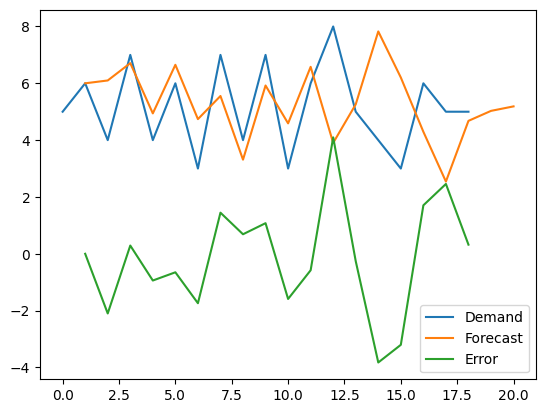

In [4]:
def double_exponential_smoothing(demand=[],forecast_period=[],alpha=[],beta=[]):

#Setup parameter
  n1 = int(input("Input number of historical demand period: "))
  for i in range(n1):
      n2 = int(input())
      demand.append(n2)
  forecast_period = int(input("Input number of forecast period: "))
  alpha = float(input("Input alpha with 0 <= alpha <= 1: "))
  beta = float(input("Input beta with 0 <= beta <= 1: "))

# Append np.nan into the demand array to cover future period
  demand = np.append(demand,[np.nan]*forecast_period)
# Define the forecast, level, trend array
  forecast, level, trend = np.full((3,n1+forecast_period),np.nan)
# Initialization of first forecast
  level[0] = demand[0]
  trend[0] = demand[1]-demand[0]
# Create all the t+1 forecast until end of historical period
  for t in range(1,n1):
    forecast[t] = level[t-1]+trend[t-1]
    level[t] = alpha*demand[t-1]+(1-alpha)*(level[t-1]+trend[t-1])
    trend[t] = beta*(level[t]-level[t-1])+(1-beta)*trend[t-1]

# Forecast for all extra periods
  for t in range(n1,n1+forecast_period):
    forecast[t] = level[t-1]+trend[t-1]
    level[t]=forecast[t]
    trend[t]=trend[t-1]

  error=demand-forecast
  df = pd.DataFrame.from_dict({'Demand':demand,'Forecast':forecast,'Error':error})
  df[['Demand','Forecast','Error']].plot()
  return df

KPI(double_exponential_smoothing())
